In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

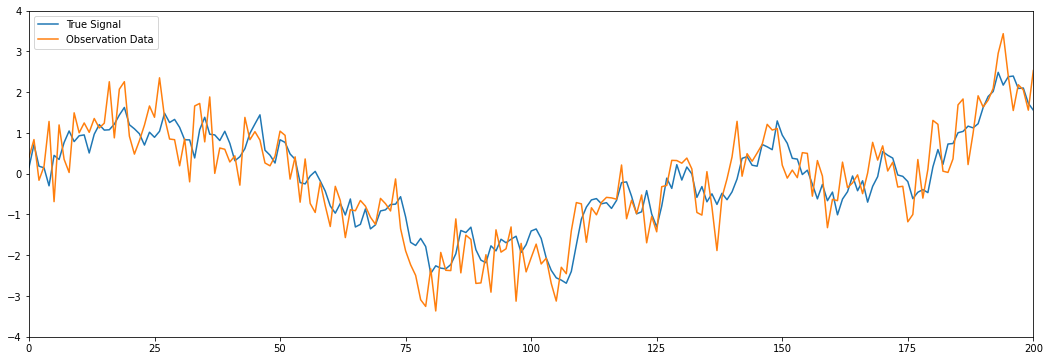

In [2]:
#Read the true signal
h = open('reference_signal.txt', 'r')

ground_truth_xs = []

for line in h:
    ground_truth_xs.append(float(line))

#Read the observation data
h = open('data.txt', 'r')

measurement_state = []

for line in h:
    measurement_state.append(float(line))

# Compare True Signal and Observation Data
plt.figure(figsize=(18, 6))
plt.plot(ground_truth_xs, label='True Signal')
plt.plot(measurement_state, label='Observation Data')
plt.legend()
plt.xlim(0,200)
plt.ylim(-4,4)
plt.show()

The graph shows the true signal and the observation data.

## Kalman Filter

In [3]:
#Convert the true signal into array
ground_truth_xs = np.asarray(ground_truth_xs)

In [4]:
#Initialize all the parameters
num_steps = len(measurement_state) + 1

mu_current = [num_steps]
Sigma_current = [num_steps]
mu_current[0] = 0
Sigma_current[0] = 0.5

A = 0.99
B = 0.5

measurement_states = []
filtered_states = []

for i in np.arange(1, num_steps):
    predicted_mu = A * mu_current[i - 1]
    #print(predicted_mu)
    predicted_Sigma = A * Sigma_current[i - 1] * A + B
    #print(predicted_Sigma)
    
    k = predicted_Sigma / (0.5 + predicted_Sigma)
    #print(k)
    
    mu_current.append(predicted_mu - k * (predicted_mu - measurement_state[i-1]))
    Sigma_current.append(predicted_Sigma - k * predicted_Sigma)
    

## Calculate the MSE for Kalman Filter

In [5]:
from statistics import mean

def mse(x1, x2):
    return mean((x1 - x2)**2)

mse(ground_truth_xs, mu_current)

0.12579321599921697

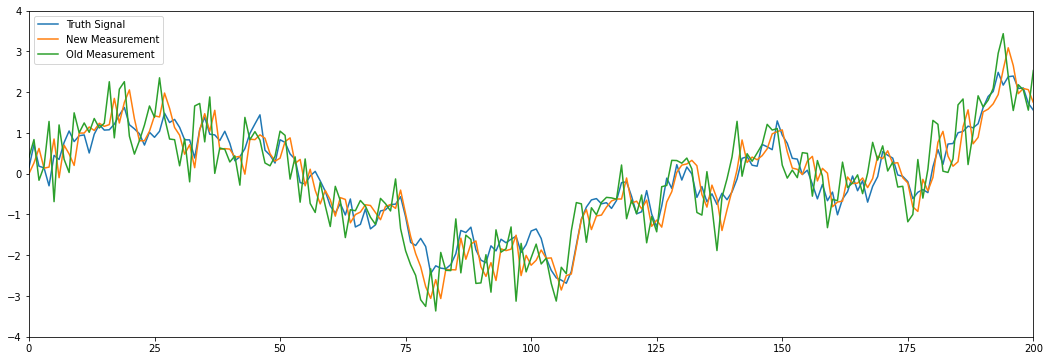

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(ground_truth_xs)
plt.plot(mu_current)
plt.plot(measurement_state)
#plt.plot(filtered_states[:,0])
plt.legend(['Truth Signal', 'New Measurement', 'Old Measurement'])
plt.xlim(0,200)
plt.ylim(-4,4)
plt.show()

The graph shows the difference between True signal, and new Measurement. Their difference are not so much. 

## Ensemble Kalman Filter